# Heart Failure Prediction
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure. Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

In [70]:
#Importing all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('C:/Users/user/Desktop/project/Heart_pred/Heart_Dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [28]:
df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [14]:
df.shape

(299, 13)

In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [17]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
df.columns.unique()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:>

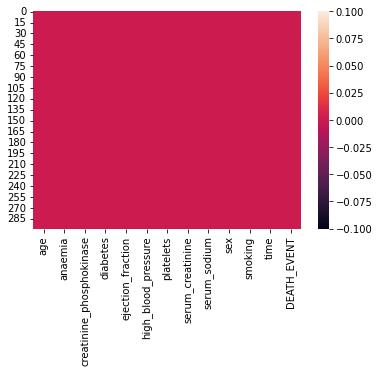

In [20]:
sns.heatmap(df.isna())

<AxesSubplot:>

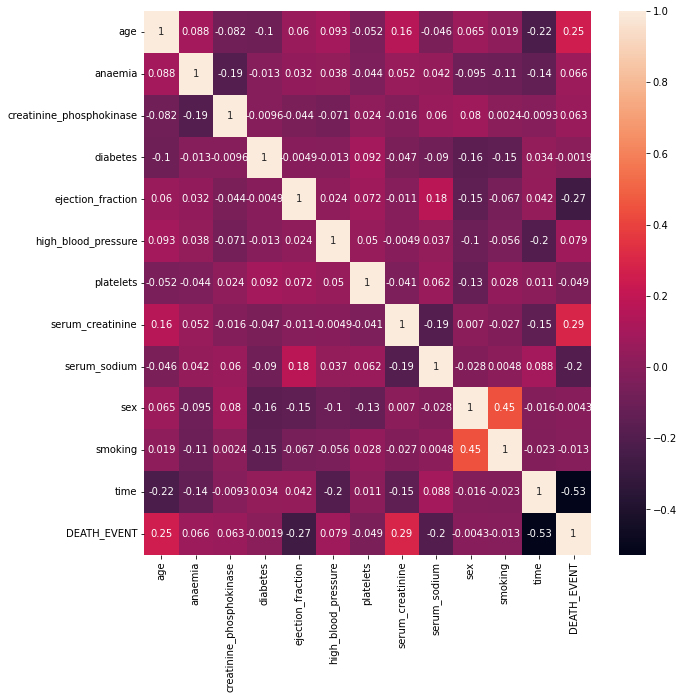

In [26]:
#Correalation
cor=df.corr()
cor
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot = True)

In [ ]:
#As our data does'nt contain any missig values we have to do data wrangling to transform categorical data to numerical data
# we will going to create prediction model now

In [40]:
df2 = df.drop(['DEATH_EVENT'],axis = 1)
y = df['DEATH_EVENT']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.30, random_state=42)

# Model Selection

In [68]:
# XG boost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb= XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracyxgb = accuracy_score(y_test,xgb_pred)
print("XG Boost model accuracy(in %):", accuracyxgb*100)

XG Boost model accuracy(in %): 76.66666666666667


In [69]:
from sklearn.svm import SVC
classifier = SVC(C = 100,kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
accuracysvc = accuracy_score(y_test,Y_pred)
print("XG Boost model accuracy(in %):", accuracysvc*100)

XG Boost model accuracy(in %): 55.55555555555556


In [82]:
from sklearn.linear_model import LogisticRegression

logmodel= LogisticRegression()

logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracyLG = accuracy_score(y_test,predictions)
accuracyLG
print("Logistic Regression model accuracy(in %):", accuracyLG*100)

Logistic Regression model accuracy(in %): 80.0


In [79]:

# #  grid searching key hyperparametres for logistic regression

# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# # define dataset
# # X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# # define models and parameters
# model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2','l1']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_test, y_test)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.785185 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.737037 (0.112887) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777778 (0.125051) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.774074 (0.116475) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.729630 (0.113614) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.737037 (0.109181) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.777778 (0.131468) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.785185 (0.118055) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.729630 (0.098061) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.740741 (0.104757) with: {

C:\python 310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\python 310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\python 310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\python 310\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2'

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(X_train, y_train)
NB_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, NB_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 76.66666666666667


In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Random Forest Classifier  model accuracy(in %):", metrics.accuracy_score(y_test, rfc_pred)*100)

Random Forest Classifier  model accuracy(in %): 77.77777777777779
